# Database 

In [1]:
# Import functions and models
from aux import *
# Set seed
seed = 2020

Using TensorFlow backend.


Firsly, the dataset is read using InferPy as it is included in the package.

In [2]:
# load the data
(X, y), _ = mnist.load_data(num_instances=1000, digits=[1,4,7])
dataset = pd.DataFrame(data=X)
dataset["number"] = y

Display the first 5 rows of the dataset.

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,number
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [4]:
X = dataset.drop(['number'], axis=1)
y = dataset['number']

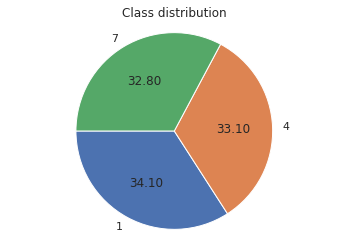

In [5]:
print_class_pie_diagram(y, ["1", "4", "7"])

# Constants

In [6]:
# Hidden space dimensionality
hidden_space_dim = 2
# Ammount of samples
n_samples = X.shape[0]
# Observed space dimensionality
observed_space_dim = X.shape[1]
# Ammount of classes
n_classes = len(y.unique())
# Hidden layer dimension for Non-linear PCA and VAE
hidden_layer_dim = 100
# Training epochs
num_epochs = 4000
# Learning rate for Adam optimizer
learning_rate = 0.01

# Reduction to 2-dimensional space

## Probabilistic PCA

In [7]:
# create an instance of the P model and the Q model
pca_model = pca(hidden_space_dim, observed_space_dim)
pca_q = Q_pca(hidden_space_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_pca = inf.inference.VI(pca_q, optimizer=optimizer, epochs=num_epochs)

We fit the model using the dataset ```X```.

In [8]:
pca_model.fit({"x": X}, VI_pca)        


 0 epochs	 2288556288.0....................
 200 epochs	 2006742016.0....................
 400 epochs	 1542379776.0....................
 600 epochs	 1374032384.0....................
 800 epochs	 1328647552.0....................
 1000 epochs	 1299639296.0....................
 1200 epochs	 1227435392.0....................
 1400 epochs	 1144302208.0....................
 1600 epochs	 1094955008.0....................
 1800 epochs	 1075942400.0....................
 2000 epochs	 1069536832.0....................
 2200 epochs	 1067057408.0....................
 2400 epochs	 1065858560.0....................
 2600 epochs	 1065267136.0....................
 2800 epochs	 1064500352.0....................
 3000 epochs	 1064028160.0....................
 3200 epochs	 1063384768.0....................
 3400 epochs	 1062836672.0....................
 3600 epochs	 1062248128.0....................
 3800 epochs	 1061669824.0....................

The evolution of the loss function over the training is:

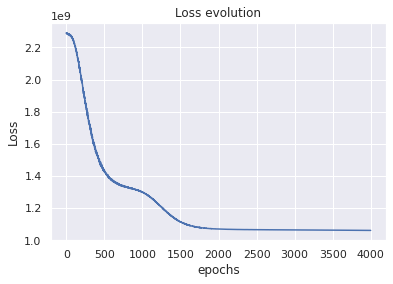

In [9]:
print_loss_function(VI_pca)

We plot the posterior using the learned model and the data.

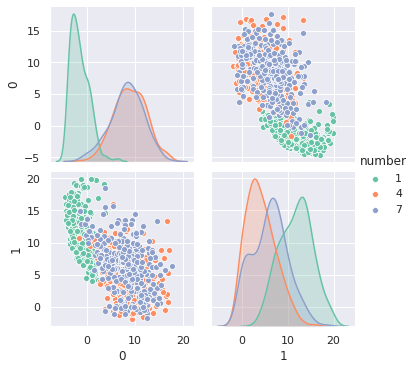

In [10]:
z = pca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

We can obtain the transformation by taking the posterior distribution of ```w``` and ```w0```.

In [11]:
post = pca_model.posterior("w").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [[-0.00605621  0.00309625 -0.00290115 ...  0.00439602  0.00644209
  -0.00265237]
 [ 0.0017591   0.00805574 -0.0062938  ... -0.00936722  0.00316979
  -0.00320198]]
Scale: [[0.01500005 0.01453008 0.01436006 ... 0.01408917 0.01391578 0.01540289]
 [0.01289647 0.01256302 0.01214855 ... 0.01297084 0.01317686 0.0133739 ]]


In [12]:
post = pca_model.posterior("w0").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [ 5.72318397e-03  8.47071223e-03  3.22422339e-03  6.27958542e-03
  8.61287396e-03  5.07208193e-03  1.41125219e-02  3.52463615e-03
  9.96332616e-03  4.91729658e-03  1.92678533e-02  1.02669913e-02
  1.45510463e-02  9.50289052e-03  6.66158833e-03 -3.05897556e-03
  1.17565067e-02  9.00451094e-03  1.10158380e-02  8.00546724e-03
  7.61697534e-03  5.60537400e-03  3.70654883e-03  1.16607957e-02
  9.11707338e-03  9.51080211e-03  1.17346402e-02  3.71870562e-03
  1.27883088e-02  4.35115350e-03  7.01326237e-04  4.25834395e-03
  9.59133822e-03  4.08463087e-03  2.53586750e-03  9.96166095e-03
  1.86245609e-02  1.22856665e-02  1.01765543e-02  3.92220262e-03
  2.41614645e-03  5.35051664e-03  6.55076560e-03  1.11743007e-02
  2.22081551e-03  9.60787851e-03 -6.99629018e-04  1.09475181e-02
  9.81235038e-03  1.36552742e-02  1.09163187e-02  3.52685107e-03
  7.68049108e-03 -2.27127015e-03  8.36868491e-03  1.23101147e-02
  1.57451648e-02  2.07293546e-03  7.75997154e-03  5.67224203e-03
  5.87552367e-03  6.

### Test Separability

We train an SVM to learn the dataset before and after applying the reduction, scores are shown below.

In [13]:
test_separability(X,z,y)

SVM score in observed space: 0.998
SVM score in hidden space: 0.736


## Non-linear PCA

In [14]:
# create an instance of the P model and the Q model
nlpca_model = nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)
nlpca_q = Q_nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_nlpca = inf.inference.VI(nlpca_q, optimizer=optimizer, epochs=num_epochs)

In [15]:
nlpca_model.fit({"x": X}, VI_nlpca)        


 0 epochs	 2700387328.0....................
 200 epochs	 1585249536.0....................
 400 epochs	 1476275072.0....................
 600 epochs	 1432748032.0....................
 800 epochs	 1367973504.0....................
 1000 epochs	 1185608448.0....................
 1200 epochs	 1116954624.0....................
 1400 epochs	 1060541056.0....................
 1600 epochs	 992804800.0....................
 1800 epochs	 933643008.0....................
 2000 epochs	 906921280.0....................
 2200 epochs	 887966400.0....................
 2400 epochs	 874748032.0....................
 2600 epochs	 861541056.0....................
 2800 epochs	 846888768.0....................
 3000 epochs	 821286848.0....................
 3200 epochs	 794757632.0....................
 3400 epochs	 769824960.0....................
 3600 epochs	 750613184.0....................
 3800 epochs	 734349056.0....................

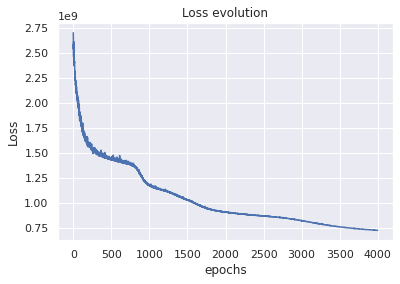

In [16]:
print_loss_function(VI_nlpca)

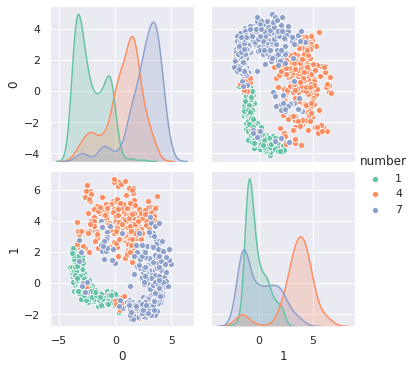

In [17]:
z = nlpca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

### Test Separability

In [18]:
test_separability(X,z,y)

SVM score in observed space: 0.998
SVM score in hidden space: 0.923


## Variational auto-encoder

In [19]:
vae_model = vae(hidden_space_dim, hidden_layer_dim, observed_space_dim)
q_vae = Q_vae(hidden_space_dim , hidden_layer_dim, observed_space_dim)

optimizer = tf.train.AdamOptimizer(learning_rate)
VI_vae = inf.inference.VI(q_vae, optimizer=optimizer, epochs=num_epochs)

In [20]:
vae_model.fit({"x": X}, VI_vae)


 0 epochs	 2403610624.0....................
 200 epochs	 845858368.0....................
 400 epochs	 775433344.0....................
 600 epochs	 745283904.0....................
 800 epochs	 731301120.0....................
 1000 epochs	 708323264.0....................
 1200 epochs	 693908800.0....................
 1400 epochs	 688191680.0....................
 1600 epochs	 670206080.0....................
 1800 epochs	 657436736.0....................
 2000 epochs	 642935872.0....................
 2200 epochs	 635432704.0....................
 2400 epochs	 632631168.0....................
 2600 epochs	 624032512.0....................
 2800 epochs	 619185216.0....................
 3000 epochs	 618675520.0....................
 3200 epochs	 615727232.0....................
 3400 epochs	 608028288.0....................
 3600 epochs	 616832768.0....................
 3800 epochs	 611629632.0....................

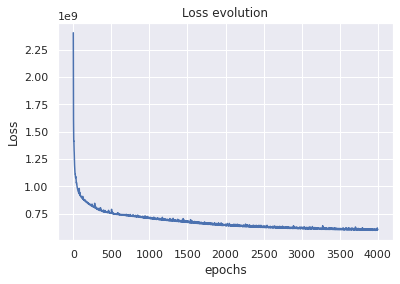

In [21]:
print_loss_function(VI_vae)

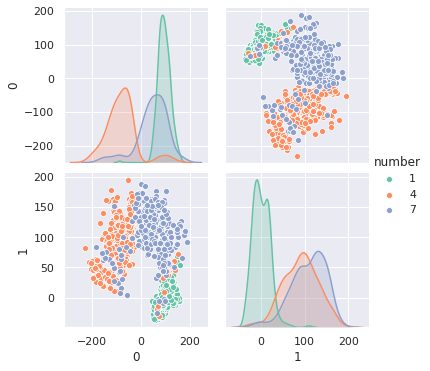

In [22]:
z = vae_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

### Test Separability


In [23]:
test_separability(X,z,y)

SVM score in observed space: 0.998
SVM score in hidden space: 0.931


# Reduction to 3-dimensional space

We set the hidden space to be 3-dimensional.

In [24]:
hidden_space_dim = 3

## Probabilistic PCA

In [25]:
# create an instance of the P model and the Q model
pca_model = pca(hidden_space_dim, observed_space_dim)
pca_q = Q_pca(hidden_space_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_pca = inf.inference.VI(pca_q, optimizer=optimizer, epochs=num_epochs)
# Training
pca_model.fit({"x": X}, VI_pca)        


 0 epochs	 2289536000.0....................
 200 epochs	 1930237312.0....................
 400 epochs	 1442548352.0....................
 600 epochs	 1330928128.0....................
 800 epochs	 1249918720.0....................
 1000 epochs	 1150551424.0....................
 1200 epochs	 1075217024.0....................
 1400 epochs	 1019416192.0....................
 1600 epochs	 983162112.0....................
 1800 epochs	 963281024.0....................
 2000 epochs	 951928192.0....................
 2200 epochs	 944976704.0....................
 2400 epochs	 939429056.0....................
 2600 epochs	 935279552.0....................
 2800 epochs	 932039808.0....................
 3000 epochs	 929784192.0....................
 3200 epochs	 928107008.0....................
 3400 epochs	 926937664.0....................
 3600 epochs	 926052928.0....................
 3800 epochs	 925211968.0....................

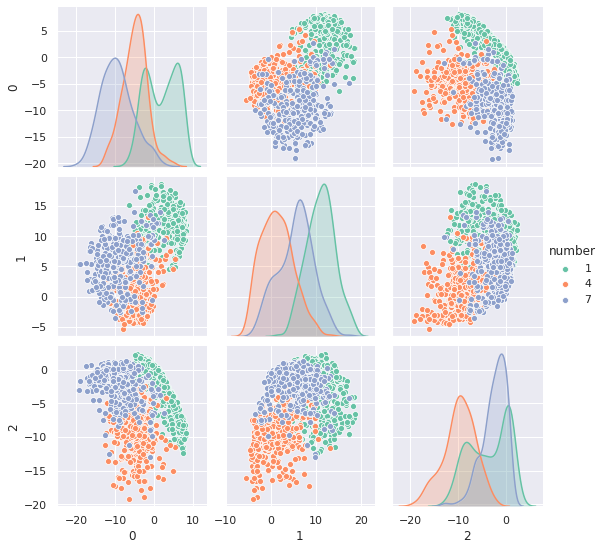

In [26]:
z = pca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

In [27]:
test_separability(X,z,y)

SVM score in observed space: 0.998
SVM score in hidden space: 0.914


## Non-linear PCA

In [28]:
# create an instance of the P model and the Q model
nlpca_model = nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)
nlpca_q = Q_nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_nlpca = inf.inference.VI(nlpca_q, optimizer=optimizer, epochs=num_epochs)
# Training
nlpca_model.fit({"x": X}, VI_nlpca)


 0 epochs	 2708032512.0....................
 200 epochs	 1675032576.0....................
 400 epochs	 1467309440.0....................
 600 epochs	 1431726848.0....................
 800 epochs	 1391299072.0....................
 1000 epochs	 1338411648.0....................
 1200 epochs	 1156913664.0....................
 1400 epochs	 1115213312.0....................
 1600 epochs	 1058100800.0....................
 1800 epochs	 979559488.0....................
 2000 epochs	 873954624.0....................
 2200 epochs	 814475648.0....................
 2400 epochs	 782341568.0....................
 2600 epochs	 747689216.0....................
 2800 epochs	 724177024.0....................
 3000 epochs	 697307264.0....................
 3200 epochs	 677416192.0....................
 3400 epochs	 659821696.0....................
 3600 epochs	 645748160.0....................
 3800 epochs	 630936256.0....................

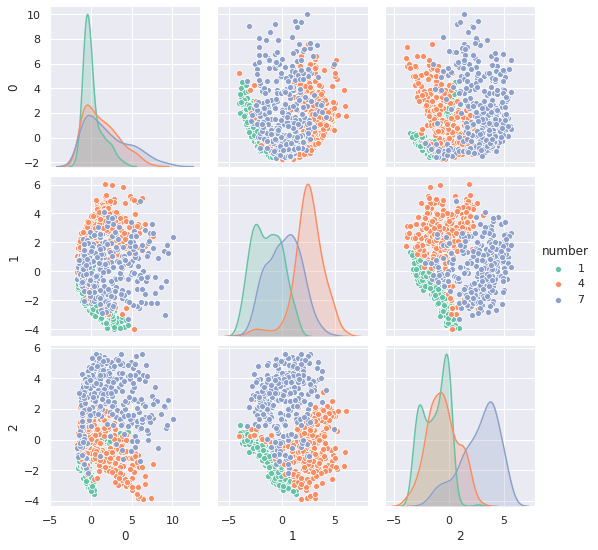

In [29]:
z = nlpca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

In [30]:
test_separability(X,z,y)

SVM score in observed space: 0.998
SVM score in hidden space: 0.947


## Variational auto-encoder

In [31]:
vae_model = vae(hidden_space_dim, hidden_layer_dim, observed_space_dim)
q_vae = Q_vae(hidden_space_dim , hidden_layer_dim, observed_space_dim)

optimizer = tf.train.AdamOptimizer(learning_rate)
VI_vae = inf.inference.VI(q_vae, optimizer=optimizer, epochs=num_epochs)
vae_model.fit({"x": X}, VI_vae)


 0 epochs	 2566112512.0....................
 200 epochs	 644290560.0....................
 400 epochs	 581179456.0....................
 600 epochs	 546506112.0....................
 800 epochs	 551648576.0....................
 1000 epochs	 523391104.0....................
 1200 epochs	 510078560.0....................
 1400 epochs	 500171360.0....................
 1600 epochs	 492906368.0....................
 1800 epochs	 490964448.0....................
 2000 epochs	 481147136.0....................
 2200 epochs	 472091968.0....................
 2400 epochs	 475216992.0....................
 2600 epochs	 466212640.0....................
 2800 epochs	 455045792.0....................
 3000 epochs	 453768416.0....................
 3200 epochs	 454458560.0....................
 3400 epochs	 459312896.0....................
 3600 epochs	 446169472.0....................
 3800 epochs	 438450688.0....................

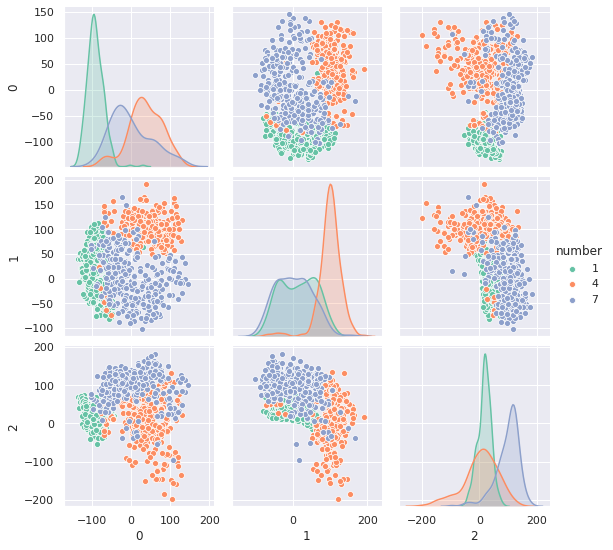

In [32]:
z = vae_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

In [33]:
test_separability(X,z,y)

SVM score in observed space: 0.998
SVM score in hidden space: 0.968
